In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

## Read the data

In [3]:
# Read the data
data = pd.read_csv('Final_Data.csv')

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data

,psdbeta_9,psdbeta_13,psdtheta_13,psdtheta_3,psdalpha_9,psdalpha_3,psdalpha_7,psdbeta_5,psdalpha_13,psdalpha_8,...,HRV_CVI,HRV_Prc80NN,HRV_HF,HRV_Ca,HRV_LFHF,HRV_SD1a,HRV_S,HRV_MadNN,HRV_SD2a,target
0,-0.353098,-0.419732,-0.343952,-0.475254,-0.373330,-0.468150,-0.261720,-0.279274,-0.350667,-0.504424,...,1.011948,1.005051,3.627621,1.049158,0.410145,1.077186,1.123119,1.000000,1.086576,7
1,-0.164130,-0.175393,-0.111932,0.302383,0.038875,0.258150,-0.161049,-0.169434,-0.116607,0.018493,...,0.939026,0.894635,0.450490,0.992888,0.572625,0.643784,0.536757,0.843750,0.835036,0
2,-0.027737,-0.117177,-0.128325,0.063157,0.033106,0.057745,-0.132559,-0.149021,-0.128255,-0.093871,...,0.988428,1.027902,4.489243,0.753055,0.717908,1.020287,0.888804,0.923684,0.762874,2
3,-0.210938,-0.311654,-0.275669,-0.067104,-0.191371,-0.068218,-0.194850,-0.230109,-0.279672,-0.325007,...,0.957135,0.948635,0.717087,0.785177,1.222864,0.716231,0.652118,0.812500,0.726417,5
4,0.203095,0.125982,0.002496,0.314590,0.208960,0.301284,-0.017967,-0.054181,0.011464,0.066537,...,1.051062,1.075500,1.381814,0.980383,0.086450,1.428653,1.643596,1.238095,1.264587,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,-0.428960,0.063415,0.175457,-0.282586,-0.368012,-0.281040,0.072221,-0.314611,0.173249,-0.318572,...,1.006056,0.965517,1.542216,1.377285,0.475373,1.126089,1.069732,1.225000,1.399569,4
410,-0.441018,-0.490378,-0.397149,-0.452527,-0.375395,-0.461703,-0.363734,-0.305926,-0.405788,-0.440295,...,1.093039,1.055042,45.577436,1.359336,0.589387,1.702592,2.730477,0.805556,1.437567,5
411,-0.237420,-0.042684,-0.018424,0.225323,-0.196020,0.234515,-0.293675,-0.084264,-0.020970,-0.206560,...,1.043203,1.000000,1.232263,1.006177,1.095624,1.101661,1.555066,1.500000,1.344214,1
412,-0.417094,-0.480054,-0.405573,-0.238502,-0.356731,-0.241715,-0.260885,-0.278179,-0.413550,-0.372264,...,1.041377,0.985000,2.565754,0.875462,0.771653,1.052785,1.565247,1.181818,1.322039,8


In [6]:
y = data.target
X = data.drop('target' , axis = 1)

## Splitting the data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
y_test = np.array(y_test)

In [9]:
# Function to evaluate the model
def Evaluate (y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='weighted')
    recall = recall_score(y_test, prediction, average='weighted')
    f1 = f1_score(y_test, prediction, average='weighted')
    return accuracy, precision, recall, f1

# KNN model

### Choosing the best k value

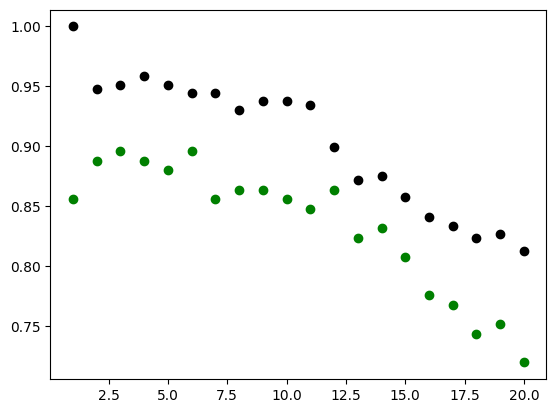

In [10]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
  
    training_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Making the model

In [11]:
# KNN classifier
def KNN(X_train, y_train, X_test, y_test, num_neighbors):
    
    # create the model
    KNN = KNeighborsClassifier(n_neighbors = num_neighbors)
    
    # fit the model
    KNN.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = KNN.score(X_test, y_test)
    train_accuracy = KNN.score(X_train, y_train)
    
    # predict the values
    prediction = KNN.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction

In [12]:
KNN_test, KNN_train, KNN_prediction = KNN(X_train, y_train, X_test, y_test, 6)
print(KNN_test, KNN_train)

0.896 0.9446366782006921


### Evaluating the model

In [13]:
accuracy_score, precision_score, recall_score, f1_score = Evaluate(y_test, KNN_prediction)

In [14]:
Scores = {
    "Model":["KNN"],\
    "Accuracy":[accuracy_score*100],\
    "Precision":[precision_score*100],\
    "Recall":[recall_score*100],\
    "F1":[f1_score*100]
    }

Scores=pd.DataFrame(Scores)
Scores

,Model,Accuracy,Precision,Recall,F1
0,KNN,89.6,90.997569,89.6,89.580559


# SVM models

In [15]:
def SVM (X_train, y_train, X_test, y_test, kernel):

    # create the model for multiclass classification
    SVM = svm.SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    
    # fit the model
    SVM.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = SVM.score(X_test, y_test)
    train_accuracy = SVM.score(X_train, y_train)
    
    # predict the values
    prediction = SVM.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction

In [16]:
# SVM classifier using linear kernel
SVM_linear_test, SVM_linear_train, SVM_linear_prediction = SVM(X_train, y_train, X_test, y_test, 'linear')
print(SVM_linear_test, SVM_linear_train)

0.808 0.8961937716262975


In [17]:
# SVM classifier using RBF kernel
SVM_rbf_test, SVM_rbf_train, SVM_rbf_prediction = SVM(X_train, y_train, X_test, y_test, 'rbf')
print(SVM_rbf_test, SVM_rbf_train)

0.464 0.5467128027681661


In [18]:
# SVM classifier using sigmoid kernel
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(SVM_sigmoid_test, SVM_sigmoid_train)

0.104 0.1453287197231834


In [19]:
# SVM classifier using polynomial kernel
SVM_poly_test, SVM_poly_train, SVM_poly_prediction = SVM(X_train, y_train, X_test, y_test, 'poly')
print(SVM_poly_test, SVM_poly_train)

0.488 0.5501730103806228


### Evaluating the models

In [20]:
accuracy_score_poly, precision_score_poly, recall_score_poly, f1_score_poly = Evaluate(y_test, SVM_poly_prediction)

accuracy_score_linear, precision_score_linear, recall_score_linear, f1_score_linear = Evaluate(y_test, SVM_linear_prediction)

accuracy_score_sigmoid, precision_score_sigmoid, recall_score_sigmoid, f1_score_sigmoid = Evaluate(y_test, SVM_sigmoid_prediction)

accuracy_score_rbf, precision_score_rbf, recall_score_rbf, f1_score_rbf = Evaluate(y_test, SVM_rbf_prediction)

TypeError: 'numpy.float64' object is not callable

In [ ]:
Scores = {
    "Model":["Linear SVM","RBF SVM","Sigmoid SVM","Poly SVM"],\
    "Accuracy":[accuracy_score_linear*100, accuracy_score_rbf*100, accuracy_score_sigmoid*100, accuracy_score_poly*100],\
    "Precision":[precision_score_linear*100, precision_score_rbf*100, precision_score_sigmoid*100, precision_score_poly*100],\
    "Recall":[recall_score_linear*100, recall_score_rbf*100, recall_score_sigmoid*100, recall_score_poly*100],\
    "F1":[f1_score_linear*100, f1_score_rbf*100, f1_score_sigmoid*100, f1_score_poly*100]
    }

Scores=pd.DataFrame(Scores)
Scores

In [362]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Logistic Regression model

In [21]:
def Logistic_Regression (X_train, y_train, X_test, y_test):
    # create the model
    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

    # fit the model
    log_reg.fit(X_train, y_train)

    # get the accuracy
    test_accuracy = log_reg.score(X_test, y_test)
    train_accuracy = log_reg.score(X_train, y_train)

    # predict the values
    prediction = log_reg.predict(X_test)

    return test_accuracy, train_accuracy, prediction

In [22]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction = Logistic_Regression(X_train, y_train, X_test, y_test)
print(LOG_REG_test, LOG_REG_train)

0.4 0.5674740484429066


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
accuracy_score_LOG, precision_score_LOG,recall_score_LOG, f1_score_LOG  = Evaluate(y_test, LOG_REG_prediction)
print(accuracy_score_LOG, precision_score_LOG,recall_score_LOG, f1_score_LOG)

TypeError: 'numpy.float64' object is not callable